In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV

In [2]:
def tofread_csv(rawdata):
    #read csv file.
    data = pd.read_csv(rawdata)
    #rennaming 1st column as ID
    data = data.rename(index=str, columns={"Unnamed: 0": "ID"})
    #drop columns that have volume and size
    data = data[data.columns.drop(list(data.filter(regex='vol')))]
    data = data[data.columns.drop(list(data.filter(regex='size')))]
    data.columns = data.columns.str.replace('_mass_g','')
    return data

def tofreadcount_csv(rawdata):
    data = pd.read_csv(rawdata)
    data = data.rename(index=str, columns={"Unnamed: 0": "ID"})
    data = data[data.columns.drop(list(data.filter(regex='time')))]
    data.columns = data.columns.str.replace('c','')
    return data

## Storing Bkg, Counts, and Calc. Mass

In [3]:
# importing the data
#4_12_19
TiOBS3 = tofreadcount_csv('background sample_data/4_12_19/Counts_Bkg__Tiobs3.csv')
TiOBS5 = tofreadcount_csv('background sample_data/4_12_19/Counts_Bkg__Tiobs5.csv')

data41219 = [TiOBS3, TiOBS5]
data41219keys = ['TiOBS3', 'TiOBS5']

#4_30_19
Frsludge44 = tofreadcount_csv('background sample_data/4_30_19/Counts_Bkg__Frsludge44.csv')

data43019 = [Frsludge44]
data43019keys = ['Frsludge44']

#6_07_19
Frsludge16 = tofreadcount_csv('background sample_data/6_07_19/Counts_Bkg__67Frsludge16.csv')
Frsoil16 = tofreadcount_csv('background sample_data/6_07_19/Counts_Bkg__67Frsoil16.csv')
Frsoilsludge16 = tofreadcount_csv('background sample_data/6_07_19/Counts_Bkg__67Frsoilsludge16.csv')
Lufa100ppm16 = tofreadcount_csv('background sample_data/6_07_19/Counts_Bkg__67Lufa100ppm16.csv')
Lufa1000ppm16 = tofreadcount_csv('background sample_data/6_07_19/Counts_Bkg__67Lufa1000ppm16.csv')
Lufa10000ppm16 = tofreadcount_csv('background sample_data/6_07_19/Counts_Bkg__67Lufa10000ppm16.csv')
LufaBlank16 = tofreadcount_csv('background sample_data/6_07_19/Counts_Bkg__67LufaBlank16.csv')
Tiobs16 = tofreadcount_csv('background sample_data/6_07_19/Counts_Bkg__67Tiobs16.csv')

data60719 = [Frsludge16, Frsoil16, Frsoilsludge16, Lufa100ppm16, Lufa1000ppm16, Lufa10000ppm16, LufaBlank16, Tiobs16]
data60719keys = ['Frsludge16', 'Frsoil16', 'Frsoilsludge16', 'Lufa100ppm16', 'Lufa1000ppm16', 'Lufa10000ppm16', 'LufaBlnk16', 'Tiobs16']

#7_02_19
LufaBlank11 = tofreadcount_csv('background sample_data/7_02_19/Counts_Bkg__LufaBlank11.csv')
LufaBlank12 = tofreadcount_csv('background sample_data/7_02_19/Counts_Bkg__LufaBlank12.csv')
LufaBlank21 = tofreadcount_csv('background sample_data/7_02_19/Counts_Bkg__LufaBlank21.csv')
LufaBlank22 = tofreadcount_csv('background sample_data/7_02_19/Counts_Bkg__LufaBlank22.csv')
LufaBlank31 = tofreadcount_csv('background sample_data/7_02_19/Counts_Bkg__LufaBlank31.csv')
LufaBlank32 = tofreadcount_csv('background sample_data/7_02_19/Counts_Bkg__LufaBlank32.csv')

data70219 = [LufaBlank11, LufaBlank12, LufaBlank21, LufaBlank22, LufaBlank31, LufaBlank32]
data70219keys = ['LufaBlank11', 'LufaBlank12', 'LufaBlank21', 'LufaBlank22', 'LufaBlank31', 'LufaBlank32']

#8_19_19
L221 = tofreadcount_csv('background sample_data/8_19_19/Counts_Bkg__22soil1.csv')
L222 = tofreadcount_csv('background sample_data/8_19_19/Counts_Bkg__22soil2.csv')
L223 = tofreadcount_csv('background sample_data/8_19_19/Counts_Bkg__22soil3.csv')
Fr1 = tofreadcount_csv('background sample_data/8_19_19/Counts_Bkg__Frsoil1.csv')
Fr2 = tofreadcount_csv('background sample_data/8_19_19/Counts_Bkg__Frsoil2.csv')
Fr3 = tofreadcount_csv('background sample_data/8_19_19/Counts_Bkg__Frsoil3.csv')
Az1 = tofreadcount_csv('background sample_data/8_19_19/Counts_Bkg__AzsoilB1.csv')
Az2 = tofreadcount_csv('background sample_data/8_19_19/Counts_Bkg__AzsoilB2.csv')
Az3 = tofreadcount_csv('background sample_data/8_19_19/Counts_Bkg__AzsoilB3.csv')
Ti301 = tofreadcount_csv('background sample_data/8_19_19/Counts_Bkg__30nm1.csv')
Ti302 = tofreadcount_csv('background sample_data/8_19_19/Counts_Bkg__30nm2.csv')
Ti303 = tofreadcount_csv('background sample_data/8_19_19/Counts_Bkg__30nm3.csv')

data81919 = [L221, L222, L223, Fr1, Fr2, Fr3, Az1, Az2, Az3, Ti301, Ti302, Ti303]
data81919keys = ['L221', 'L222', 'L223', 'Fr1', 'Fr2', 'Fr3', 'Az1', 'Az2', 'Az3' ,'Ti301', 'Ti302', 'Ti303']

#Heh 11_12_19
HehAz11 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__AZsoilA_1.csv')
HehAz12 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__AZsoilA_2.csv')
HehAz21 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__AZsoilB_1.csv')
HehAz22 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__AZsoilB_2.csv')
HehAz31 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__AZsoilC_1.csv')
HehAz32 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__AZsoilC_2.csv')

HehFr11 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__FrSoilA_1.csv')
HehFr12 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__FrSoilA_2.csv')
HehFr21 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__FrsoilB_1.csv')
HehFr22 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__FrsoilB_2.csv')
HehFr31 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__FrsoilC_1.csv')
HehFr32 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__FrsoilC_2.csv')

HehL2211 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__L22A_1.csv')
HehL2212 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__L22A_2.csv')
HehL2221 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__L22B_1.csv')
HehL2222 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__L22B_2.csv')
HehL2231 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__L22C_1.csv')
HehL2232 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__L22C_2.csv')

HehOBS1 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__OBS1.csv')
HehOBS2 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__OBS2.csv')

Heh301 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__30nm1.csv')
Heh302 = tofreadcount_csv('background sample_data/11_12_19_HEH/Counts_Bkg__30nm2.csv')

data111219 = [HehAz11, HehAz12, HehAz21, HehAz22, HehAz31, HehAz32, HehFr11, HehFr12, HehFr21, HehFr22, HehFr31, HehFr32, HehL2211, HehL2212,
    HehL2231, HehL2232, HehOBS1, HehOBS2, Heh301, Heh302]

data11219keys = ['HehAz11', 'HehAz12', 'HehAz21', 'HehAz22', 'HehAz31', 'HehAz32', 'HehFr11', 'HehFr12', 'HehFr21', 'HehFr22', 'HehFr31', 'HehFr32', 'HehL2211', 'HehL2212',
    'HehL2231', 'HehL2232', 'HehOBS1', 'HehOBS2', 'Heh301', 'Heh302']

#Combine them all together
DATA = [data41219, data43019, data60719, data70219, data81919, data111219]
KEYS = [data41219keys, data43019keys, data60719keys, data70219keys, data81919keys, data11219keys]

In [4]:
ProcessedData41219 = pd.read_excel('background sample_data/4_12_19/processed_data.xlsx',sheet_name='Calibration', engine = 'openpyxl')

ProcessedData43019 = pd.read_excel('background sample_data/4_30_19/processed_data.xlsx',sheet_name='Calibration', engine = 'openpyxl')

ProcessedData60719 = pd.read_excel('background sample_data/6_07_19/processed_data.xlsx', sheet_name='Calibration', engine = 'openpyxl')

ProcessedData70219 = pd.read_excel('background sample_data/7_02_19/processed_data.xlsx', sheet_name='Calibration', engine = 'openpyxl')

ProcessedData81919 = pd.read_excel('background sample_data/8_19_19/processed_data.xlsx', sheet_name='Calibration', engine = 'openpyxl')

ProcessedData111219heh = pd.read_excel('background sample_data/11_12_19_HEH/processed_datac.xlsx', sheet_name='Calibration', engine = 'openpyxl')

PROCESSEDDATA = [ProcessedData41219, ProcessedData43019, ProcessedData60719, ProcessedData70219, ProcessedData81919, ProcessedData111219heh]


In [5]:
def get_detection_limit(processed_data, background_data, analyte):

    #Get the Ti particle fit and slope
    processed_dataTi = processed_data[processed_data['analyte'] == analyte]
    slope = processed_dataTi['particle_fit_slope_counts']
    intercept = processed_dataTi['particle_fit_intercept_counts']

    bkgmean = background_data[background_data[analyte].notnull()][analyte].mean()
    bkgstdev = background_data[background_data[analyte].notnull()][analyte].std()
    thresholdIUPAC = 3.29*bkgstdev + 2.72 + bkgmean
    thresholdIUPAClow = 3.29*bkgstdev + 2.72 + (bkgmean - bkgstdev)
    thresholdIUPAChigh = 3.29*bkgstdev + 2.72 + (bkgmean + bkgstdev)

    thresholdIUPACmass = (thresholdIUPAC-intercept)/slope
    thresholdIUPACmasslow = (thresholdIUPAClow-intercept)/slope
    thresholdIUPACmasshigh = (thresholdIUPAChigh-intercept)/slope
    bkgmeanmass = (bkgmean - intercept)/slope
    bkgstdev = abs(bkgstdev - intercept)/slope

    return [thresholdIUPACmass.values[0], thresholdIUPACmasslow.values[0], thresholdIUPACmasshigh.values[0], bkgmeanmass.values[0], bkgstdev.values[0]]

def masstosize(data, density, mwsingle = None, mwtotal = None):
    if mwsingle != None:
        data = data/mwsingle * mwtotal
    #mass (g) to volume (cm^3)
    volume = data/density
    #volume(cm^3) to size (nm)
    size = (volume*(3/4)/(math.pi))**(1/3)*2*10**7
    return size

In [6]:
df = pd.DataFrame()
for dataset in range(len(DATA)):
    for datasetsample in range(len(DATA[dataset])):
        df1 = pd.DataFrame([get_detection_limit(PROCESSEDDATA[dataset], DATA[dataset][datasetsample], '48Ti')[i] for i in range(5)], columns = [KEYS[dataset][datasetsample]])

        df = pd.concat([df, df1], axis = 1)

df = df.T
df.columns = ['IUPAC Average', 'IUPAC low', 'IUPAC high', 'Mass signal average', 'Mass signal standard deviation']



In [7]:
masstosize(df, 4.24, 48, 80).to_excel('figures/DetectionLimitssize.xlsx')
df.to_excel('figures/DetectionLimitsmass.xlsx')

In [66]:
Sludge1 = tofreadcount_csv("background sample_data/8_21_20/particle_background_SludgeA.csv")
Sludge2 = tofreadcount_csv("background sample_data/8_21_20/particle_background_SludgeA.csv")
Sludge3 = tofreadcount_csv("background sample_data/8_21_20/particle_background_SludgeA.csv")
Sludgecalib = pd.read_csv("background sample_data/8_21_20/calibration_curves.csv")
def sludgeanalysis(backgrounddata, analyte1, slope, intercept):
    #transform data
    bkgmean = backgrounddata[backgrounddata[analyte1].notnull()][analyte1].mean()
    bkgstdev = backgrounddata[backgrounddata[analyte1].notnull()][analyte1].std()
    thresholdIUPAC = 3.29*bkgstdev + 2.72 + bkgmean
    thresholdIUPACmass = thresholdIUPAC/slope
    return thresholdIUPACmass

In [78]:
sludgeanalysis(Sludge1,'[48Ti]+ (ts)', 3.6037*10**16, 477)

1.3700722974636116e-16

In [9]:
Aulen = [50.335,53.476,40.69,47.553,48.597,53.058,54.481,42.606,58.942, 56.391
,47.635
,56.919
,41.457
,39.104
,47.329
,34.686
,40.122
,53.376
,43.135
,42.692
,31.445
,38.124
,46.961
,48.324
,39.665
,44.215
,39.46
,42.574
,52.316
,48.442
,50.559
,46.609
,45.095
,49.551
,51.694
,46.892
,46.447
,48.459
,51.992
,43.017
,56.85
,58.893
,46.206
,56.843
,54.883
,57.339
,47.986
,45.172
,43.553
,51.977
,42.86
,55.073
,46.542
,47.311
,51.618
,54.374
,47.609
,57.673
,64.47
,49.199
,51.77
,44.424
,61.698
,48.513
,49.379
,53.295
,46.09
,64.397
,51.982
,38.408
,40.736
,46.945
,46.406
,41.465
,45.29
,56.362
,39.852
,47.582
,48.699
,42.684
,42.129
,48.362
,51.451
,40.352
,47.678
,39.313
,36.176
,46.129
,37.482
,52.446
,51.599
,53.521
,56.09
,50.249
,55.051
,45.394
,50.164
,36.513
,51.37
,57.628
,53.404
,32.856
,62.209
,45.352
,55.048
,46.276
,50.985
,47.505
,47.762
,54.282
,48.863
,38.142
,48.475
,53.456
,46.007
,39.163
,51.712
,53.961
,44.802
,57.302
,59.304
,56.157
,44.01
,55.334
,58.267
,45.084
,59.332
,57.109
,52.943
,58.573
,52.346
,43.087
,49.459
,55.764
,55.103
,51.651
,40.867
,49.138
,56.425
,57.025
,39.049
,45.273
,39.636
,44.669
,50.41
,52.975
,53.128
,51.216
,38.95
,56.688
,53.885
,48.554
,49.024
,45.816
,56.516
,58.483
,59.726
,40.242
,54.032
,57.511
,47.354
,48.101
,48.388
,47.833
,52.085
,50.464
,59.662
,41.183
,53.228
,43.181
,44.062
,45.551
,44.57
,47.742
,51.559
,49.454
,50.205
,47.331
,54.715
,48.905
,41.819
,51.455
,54.992
,44.213
,57.325
,60.292
,58.877
,41.296
,59.561
,41.794
,40.7
,46.37
,46.16
]

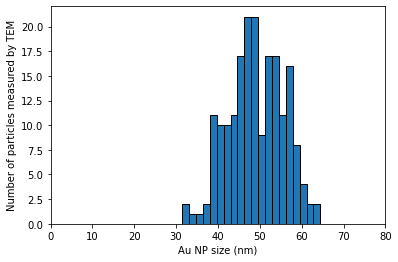

In [10]:
plt.hist(Aulen, bins = 20, edgecolor = 'black')
plt.xlim(0, 80)
plt.xlabel('Au NP size (nm)')
plt.ylabel('Number of particles measured by TEM')
plt.savefig('figures/AuNPsize.png', dpi = 300)
